## 6.6.1 Ridge Regression

$$\min_p \left\{ \sum_{i=1}^n \left( y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij} \right)^2 \right\} \; \mathrm{subject \; to} \; \sum_{j=1}^p \beta_j^2 \leq s $$
<br>
 $\lambda$값이 증가함에 따라 Ridge 회귀 계수 추정치의 shrinkage는 bias를 약간 증가시키는 한편 variance를 상당히 감소시킨다.
<br>
Ridge 회귀 분석은 Least Square 계수 추정치의 variance가 높은 상황에서 효과적임.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.5f}'.format) # get rid of scientific notation

plt.style.use('seaborn') # pretty matplotlib plots

In [2]:
hitters = pd.read_csv('datasets/Hitters.csv', index_col=0).dropna()
hitters.index.name = 'Player'

hitters = hitters.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,18]] # push salary at the end

hitters['League'] = pd.get_dummies(hitters['League']).iloc[:, 1]
hitters['Division'] = pd.get_dummies(hitters['Division']).iloc[:, 1]
hitters['NewLeague'] = pd.get_dummies(hitters['NewLeague']).iloc[:, 1]

X = hitters.iloc[:, 0:19]
y = hitters.iloc[:, 19]

In [3]:
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,...,Division,PutOuts,Assists,Errors,NewLeague,Salary
Player,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,...,1,632,43,10,1,475.00000
-Alvin Davis,479,130,18,66,72,76,...,1,880,82,14,0,480.00000
-Andre Dawson,496,141,20,65,78,37,...,0,200,11,3,1,500.00000
-Andres Galarraga,321,87,10,39,42,30,...,0,805,40,4,1,91.50000
-Alfredo Griffin,594,169,4,74,51,35,...,1,282,421,25,0,750.00000
-Al Newman,185,37,1,23,8,21,...,0,76,127,7,0,70.00000
-Argenis Salazar,298,73,0,24,24,7,...,1,121,283,9,0,100.00000
-Andres Thomas,323,81,6,26,32,8,...,1,143,290,19,1,75.00000
-Andre Thornton,401,92,17,49,66,65,...,0,0,0,0,0,"1,100.00000"


In [4]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

In [5]:
grid = 10 ** np.linspace(3,-2,100)

ridge_model = Ridge(normalize=True)
coefs = []

for a in grid:
    ridge_model.set_params(alpha=a)
    ridge_model.fit(X, y)
    coefs.append(ridge_model.coef_)

In [6]:
grid[49], 
pd.Series(coefs[49], index=X.columns) #시리즈 클래스 객체 만들기

AtBat                    0.10768
Hits                     0.48869
HmRun                    1.31796
Runs                     0.75786
RBI                      0.73100
Walks                    1.00938
Years                    2.78921
CAtBat                   0.00930
CHits                    0.03704
CHmRun                   0.27235
CRuns                    0.07422
CRBI                     0.07695
CWalks                   0.06917
League                   6.81267
Division               -33.62792
PutOuts                  0.07705
Assists                  0.01026
Errors                  -0.30280
NewLeague                5.36069
dtype: float64

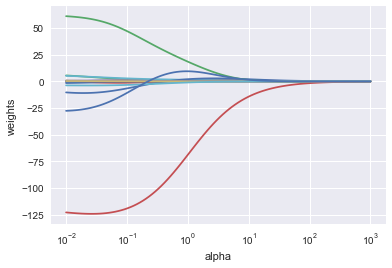

In [7]:
ax = plt.gca()
ax.plot(grid, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [9]:
# "good" ridge model
ridge2 = Ridge(alpha=4, normalize=True)
ridge2_fit = ridge2.fit(X_train, y_train)
y_pred2 = ridge2.predict(X_test)

print(pd.Series(ridge2_fit.coef_, index=X.columns))
print('MSE:', mean_squared_error(y_test, y_pred2))

AtBat                    0.09866
Hits                     0.44609
HmRun                    1.41211
Runs                     0.66077
RBI                      0.84340
Walks                    1.00847
Years                    2.77988
CAtBat                   0.00824
CHits                    0.03415
CHmRun                   0.26863
CRuns                    0.07041
CRBI                     0.07006
CWalks                   0.08279
League                   4.24105
Division               -30.76888
PutOuts                  0.10475
Assists                 -0.00374
Errors                   0.26836
NewLeague                4.12347
dtype: float64
MSE: 106216.52238005561


In [10]:
# very high lambda
ridge3 = Ridge(alpha=1e10, normalize=True)
ridge3_fit = ridge3.fit(X_train, y_train)
y_pred3 = ridge3.predict(X_test)

print(pd.Series(ridge3_fit.coef_, index=X.columns))
print('MSE:', mean_squared_error(y_test, y_pred3))

AtBat                    0.00000
Hits                     0.00000
HmRun                    0.00000
Runs                     0.00000
RBI                      0.00000
Walks                    0.00000
Years                    0.00000
CAtBat                   0.00000
CHits                    0.00000
CHmRun                   0.00000
CRuns                    0.00000
CRBI                     0.00000
CWalks                   0.00000
League                  -0.00000
Division                -0.00000
PutOuts                  0.00000
Assists                 -0.00000
Errors                   0.00000
NewLeague               -0.00000
dtype: float64
MSE: 172862.23580379886


In [11]:
# lambda=0 -> OLS
ridge4 = Ridge(alpha=0, normalize=True)
ridge4_fit = ridge4.fit(X_train, y_train)
y_pred4 = ridge4.predict(X_test)

print(pd.Series(ridge4_fit.coef_, index=X.columns))
print('MSE:', mean_squared_error(y_test, y_pred4))

AtBat                   -1.82111
Hits                     4.25916
HmRun                   -4.77340
Runs                    -0.03876
RBI                      3.98458
Walks                    3.47013
Years                    9.49824
CAtBat                  -0.60513
CHits                    2.17498
CHmRun                   2.97931
CRuns                    0.26636
CRBI                    -0.59846
CWalks                   0.17138
League                 133.74316
Division              -113.74387
PutOuts                  0.42106
Assists                  0.46438
Errors                  -6.02458
NewLeague              -81.92776
dtype: float64
MSE: 116690.46856660435


In [12]:
# cross validated ridge (10-fold)
#Ridge regression with built-in cross-validation.
ridge_cv = RidgeCV(alphas=grid, normalize=True, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

0.5857020818056667

In [13]:
# cv_lambda
ridge5 = Ridge(alpha=ridge_cv.alpha_, normalize=True)
ridge5_fit = ridge5.fit(X_train, y_train)
y_pred5 = ridge5.predict(X_test)

print(pd.Series(ridge5_fit.coef_, index=X.columns))
print('MSE:', mean_squared_error(y_test, y_pred5))

AtBat                   -0.01054
Hits                     0.85783
HmRun                   -0.25559
Runs                     0.72445
RBI                      1.31289
Walks                    2.08091
Years                    1.24184
CAtBat                   0.00674
CHits                    0.05185
CHmRun                   0.50997
CRuns                    0.10642
CRBI                     0.12755
CWalks                   0.09931
League                  18.74612
Division               -91.61325
PutOuts                  0.27850
Assists                 -0.01733
Errors                  -0.30212
NewLeague                9.99140
dtype: float64
MSE: 99805.36301929558


## 6.6.2 The Lasso

Ridge 회귀는 최종 모델에 p개의 모든 예측변수를 포함한다는 단점이 있다. Lasso는 이 단점을 보완함
<br> 식을 잘 보면 절댓값이랑 제곱이라서 아래처럼 다르게 나타난다
<br>
$$\min_p \left\{ \sum_{i=1}^n \left( y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij} \right)^2 \right\} \; \mathrm{subject \; to} \; \sum_{j=1}^p \left\vert \beta_j \right\vert \leq s $$
<img src= "https://github.com/esj205/ESC_ML_STUDY/raw/c6b943ff937365ec68258292c6ec4d5c07665b30/LectureNote/pic/fig6-7.png">

In [14]:
grid = 10 ** np.linspace(3,-2,100)

lasso_model = Lasso(normalize=True, max_iter=10000) # max_iter=10000 for removing ConvergenceWarning
coefs = []

for a in grid:
    lasso_model.set_params(alpha=a)
    lasso_model.fit(scale(X_train), y_train)
    coefs.append(lasso_model.coef_)

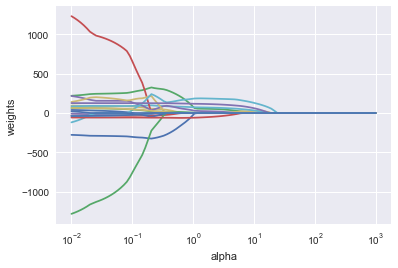

In [15]:
ax = plt.gca()
ax.plot(grid, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In [16]:
lasso_cv = LassoCV(alphas=grid, max_iter=100000, normalize=True, cv=10)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

2.364489412645407

In [17]:
lasso2 = Lasso(alpha=lasso_cv.alpha_, normalize=True, max_iter=10000)
lasso2_fit = lasso2.fit(X_train, y_train)
y_pred2 = lasso2_fit.predict(X_test)

print(pd.Series(lasso2_fit.coef_, index=X.columns))
print('MSE:', mean_squared_error(y_test, y_pred2))

AtBat                    0.00000
Hits                     1.08587
HmRun                    0.00000
Runs                     0.00000
RBI                      0.00000
Walks                    2.91350
Years                    0.00000
CAtBat                   0.00000
CHits                    0.00000
CHmRun                   0.22134
CRuns                    0.00000
CRBI                     0.51447
CWalks                   0.00000
League                   0.00000
Division               -89.91394
PutOuts                  0.36912
Assists                 -0.00000
Errors                  -0.00000
NewLeague                0.00000
dtype: float64
MSE: 104933.7532671472


## 6.7.1 Principal Components Regression

차원축소: 수많은 X변수 중 low-dimensional feature 선택<br>
각 $Z_{k}$는 모든 p개의 X predictors의 선형결합이기 때문에 X predictors를 모두 사용한다. 따라서 PCR은 변수를 제거하는 feature selection method와 다르다

In [18]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [19]:
pca = PCA()
X_pca = pca.fit_transform(scale(X))
pd.DataFrame(X_pca)

,0,1,2,3,4,5,...,13,14,15,16,17,18
0,-0.00965,1.87052,1.26515,-0.93548,1.10964,1.21197,...,0.38841,0.06360,0.14479,0.08022,0.03814,-0.01925
1,0.41143,-2.42942,-0.90919,-0.26421,1.23203,1.82662,...,-0.01939,0.06515,0.16106,0.04434,0.01483,-0.00339
2,3.46682,0.82595,0.55547,-1.61673,-0.85749,-1.02871,...,-0.37620,0.23429,0.01153,-0.21828,0.03783,-0.06650
3,-2.55832,-0.23098,0.51964,-2.17625,-0.82030,1.49170,...,0.02897,0.04246,0.05304,-0.04444,0.01036,-0.01358
4,1.02770,-1.57354,1.33138,3.49400,0.98343,0.51368,...,-0.09077,0.04381,0.01230,-0.05059,0.12604,-0.07104
5,-3.98066,1.50728,-0.15548,0.36984,-1.20933,0.03351,...,-0.23885,0.19311,-0.05744,0.05253,-0.02404,0.02506
6,-3.45172,0.59999,-0.62648,1.99978,0.80703,0.20597,...,0.17209,-0.08701,-0.04808,-0.01407,-0.02805,0.00072
7,-3.43238,0.11354,1.99975,0.76781,1.01609,-0.27280,...,0.28443,0.00656,0.06495,-0.05982,-0.06718,-0.00480
8,3.89971,1.94787,-1.82047,-0.02671,-1.13713,-0.82105,...,0.64407,-0.00599,-0.10877,0.13175,-0.05793,-0.02276
9,3.17481,-2.39237,0.79447,2.56901,-0.94733,-0.06125,...,-0.27270,-0.29059,-0.09460,0.05480,-0.02855,0.02771


In [20]:
# 10-fold CV, with shuffle
n = len(X_pca)
k10 = KFold(n_splits=10, shuffle=True, random_state=42)

lin_reg = LinearRegression()
rmse = []

# MSE with only the intercept
score = -1 * cross_val_score(lin_reg, np.ones((n,1)), y, cv=k10, scoring='neg_mean_squared_error').mean()
rmse.append(np.sqrt(score))

# MSE for the 19 principle components
for i in np.arange(1, 20):
    score = -1 * cross_val_score(lin_reg, X_pca[:,:i], y, cv=k10, scoring='neg_mean_squared_error').mean()
    rmse.append(np.sqrt(score))
    
min_rmse = np.array(rmse).argmin()

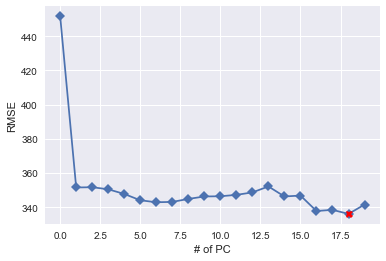

In [21]:
plt.plot(rmse, '-D')
plt.plot(rmse, markevery=[min_rmse], marker='X', lw=0, color='red')
plt.xlabel('# of PC')
plt.ylabel('RMSE');

In [22]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 38.31423957,  60.15531541,  70.8416746 ,  79.03419435,
        84.29027516,  88.63477938,  92.26288766,  94.96304322,
        96.28269124,  97.25541298,  97.97775424,  98.64870031,
        99.15178693,  99.4730334 ,  99.74659124,  99.89398793,
        99.96815949,  99.99375108, 100.        ])

In [23]:
# validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

pca2 = PCA()
X_train_pca2 = pca2.fit_transform(scale(X_train))

In [24]:
# 10-fold CV, with shuffle
n = len(X_train_pca2)
k102 = KFold(n_splits=10, shuffle=True, random_state=1)

lin_reg2 = LinearRegression()
rmse2 = []

# MSE with only the intercept
score = -1 * cross_val_score(lin_reg2, np.ones((n,1)), y_train, cv=k102, scoring='neg_mean_squared_error').mean()
rmse2.append(np.sqrt(score))

# MSE for the 19 principle components
for i in np.arange(1, 20):
    score = -1 * cross_val_score(lin_reg2, X_train_pca2[:,:i], y_train, cv=k102, scoring='neg_mean_squared_error').mean()
    rmse2.append(np.sqrt(score))

min_rmse = np.array(rmse2).argmin()

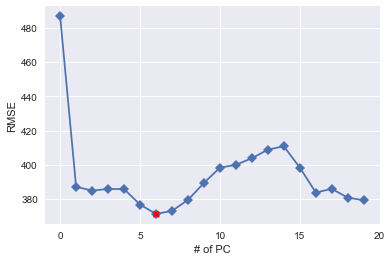

In [25]:
plt.plot(rmse2, '-D')
plt.plot(rmse2, markevery=[min_rmse], marker='X', lw=0, color='red')
plt.xlabel('# of PC')
plt.ylabel('RMSE')
plt.xticks([0, 5, 10, 15, 20]);

In [26]:
X_train_pca3 = pca2.fit_transform(scale(X_train))[:, :7]
X_test_pca3 = pca2.fit_transform(scale(X_test))[:, :7]

lin_reg3 = LinearRegression()
lin_reg3.fit(X_train_pca3, y_train)
pred_pca3 = lin_reg3.predict(X_test_pca3)

mean_squared_error(y_test, pred_pca3)

114098.05632066297

## 6.7.2 Partial Least Squares

기존 feature의 linear combinzation M개의 $Z_k$ 도출하고 이 M개의 feature들에 least squares linear regression 수행

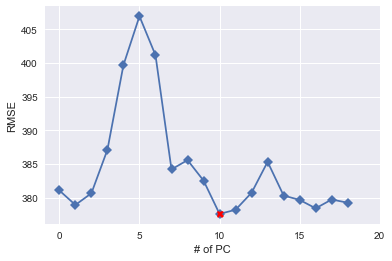

In [27]:
# 10-fold CV, with shuffle
n = len(X_train)
k10 = KFold(n_splits=10, shuffle=True, random_state=1)

rmse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = -1 * cross_val_score(pls, scale(X_train), y_train, cv=k10, scoring='neg_mean_squared_error').mean()
    rmse.append(np.sqrt(score))
    
min_rmse = np.array(rmse).argmin()

plt.plot(rmse, '-D')
plt.plot(rmse, markevery=[min_rmse], marker='X', lw=0, color='red')
plt.xlabel('# of PC')
plt.ylabel('RMSE')
plt.xticks([0, 5, 10, 15, 20]);

In [29]:
pls = PLSRegression(n_components=10) #cross-validation error가 최소가 되는 component 개수 M을 선택한다.
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

110584.60046674962